In [7]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

In [3]:
data=pd.read_csv(r'C:\Users\HP\Downloads\ecommerce_customer_data.csv')
print(data.head())

   User_ID  Gender  Age   Location Device_Type  Product_Browsing_Time  \
0        1  Female   23  Ahmedabad      Mobile                     60   
1        2    Male   25    Kolkata      Tablet                     30   
2        3    Male   32  Bangalore     Desktop                     37   
3        4    Male   35      Delhi      Mobile                      7   
4        5    Male   27  Bangalore      Tablet                     35   

   Total_Pages_Viewed  Items_Added_to_Cart  Total_Purchases  
0                  30                    1                0  
1                  38                    9                4  
2                  13                    5                0  
3                  20                   10                3  
4                  20                    8                2  


In [21]:
# Summary statistics for numeric columns
numeric_summary=data.describe()
print(numeric_summary)

          User_ID         Age  Product_Browsing_Time  Total_Pages_Viewed  \
count  500.000000  500.000000             500.000000          500.000000   
mean   250.500000   26.276000              30.740000           27.182000   
std    144.481833    5.114699              15.934246           13.071596   
min      1.000000   18.000000               5.000000            5.000000   
25%    125.750000   22.000000              16.000000           16.000000   
50%    250.500000   26.000000              31.000000           27.000000   
75%    375.250000   31.000000              44.000000           38.000000   
max    500.000000   35.000000              60.000000           50.000000   

       Items_Added_to_Cart  Total_Purchases         CLV  
count           500.000000       500.000000  500.000000  
mean              5.150000         2.464000    2.694113  
std               3.203127         1.740909    2.617384  
min               0.000000         0.000000    0.000000  
25%               2.00000

In [20]:
# Summary for non-numeric columns
categorical_summary=data.describe(include='object')
print(categorical_summary)

       Gender Location Device_Type
count     500      500         500
unique      2        8           3
top      Male  Kolkata      Mobile
freq      261       71         178


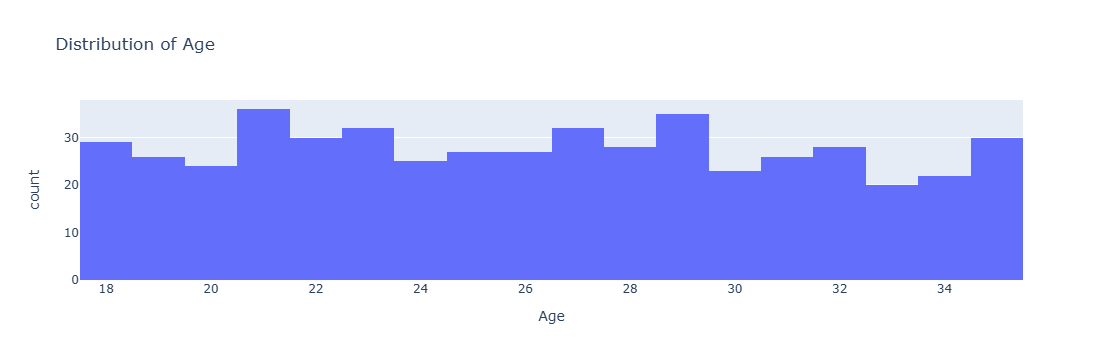

In [19]:
# Histogram for 'Age'
fig=px.histogram(data,x='Age',title='Distribution of Age')
fig.show()

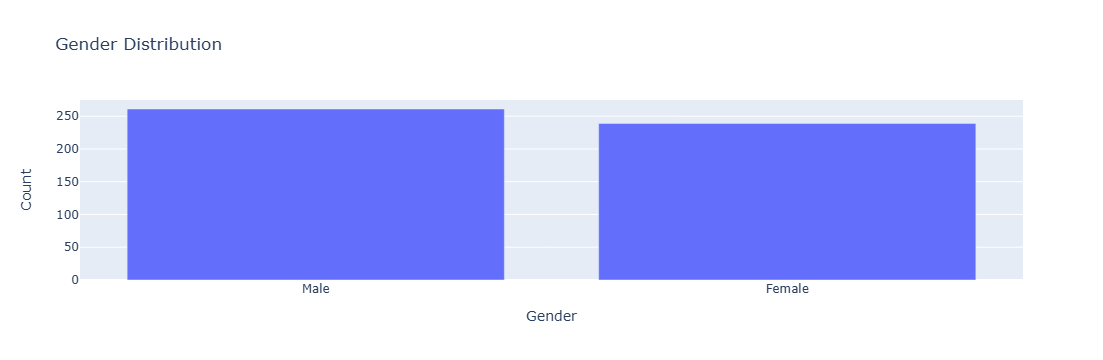

In [18]:
# Bar chart for 'Gender'
gender_counts=data['Gender'].value_counts().reset_index()
gender_counts.columns=['Gender','Count']
fig=px.bar(gender_counts,x='Gender',y='Count',title='Gender Distribution')
fig.show()

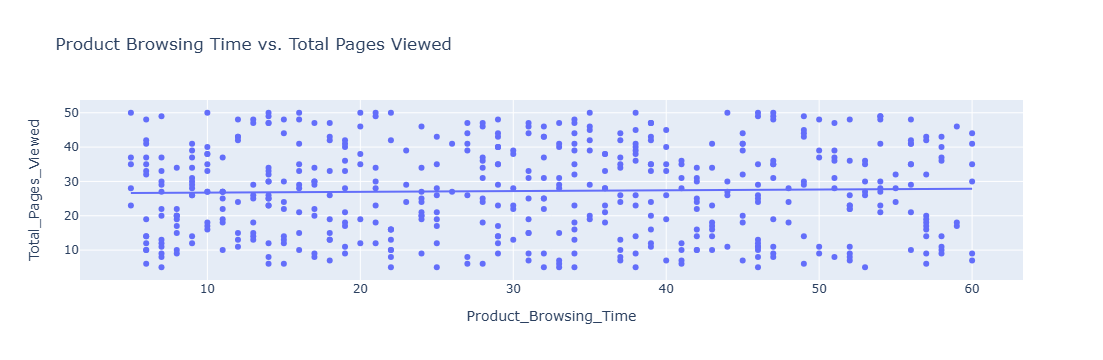

In [11]:
# 'Product_Browsing_Time' vs 'Total_Pages_Viewed'
fig = px.scatter(data, x='Product_Browsing_Time', y='Total_Pages_Viewed',title='Product Browsing Time vs. Total Pages Viewed', trendline='ols')
fig.show()

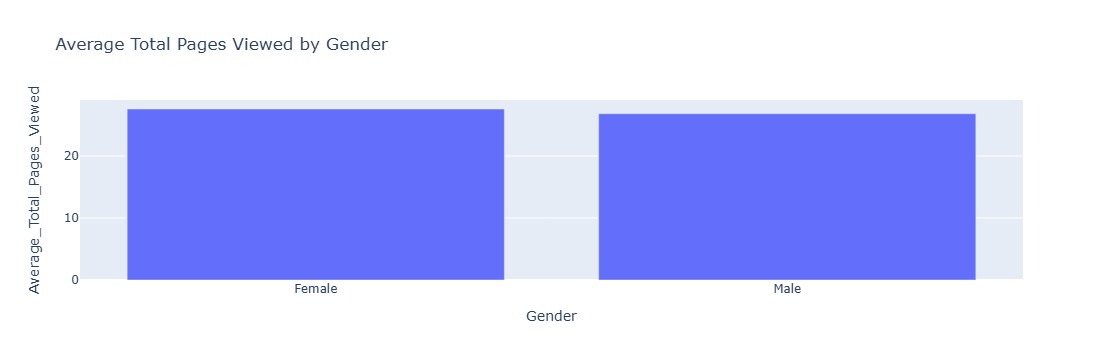

In [17]:
# Grouped Analysis
gender_grouped = data.groupby('Gender')['Total_Pages_Viewed'].mean().reset_index()
gender_grouped.columns = ['Gender', 'Average_Total_Pages_Viewed']
fig = px.bar(gender_grouped, x='Gender', y='Average_Total_Pages_Viewed',title='Average Total Pages Viewed by Gender')
fig.show()

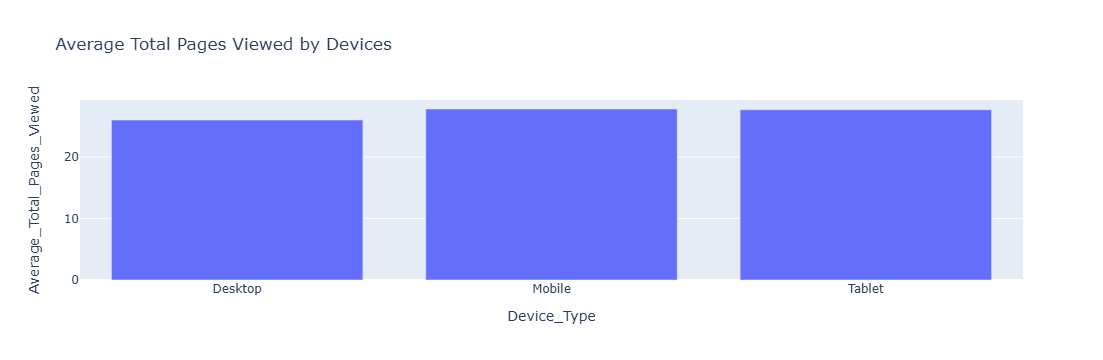

In [13]:
devices_grouped = data.groupby('Device_Type')['Total_Pages_Viewed'].mean().reset_index()
devices_grouped.columns = ['Device_Type', 'Average_Total_Pages_Viewed']
fig = px.bar(devices_grouped, x='Device_Type', y='Average_Total_Pages_Viewed',title='Average Total Pages Viewed by Devices')
fig.show()

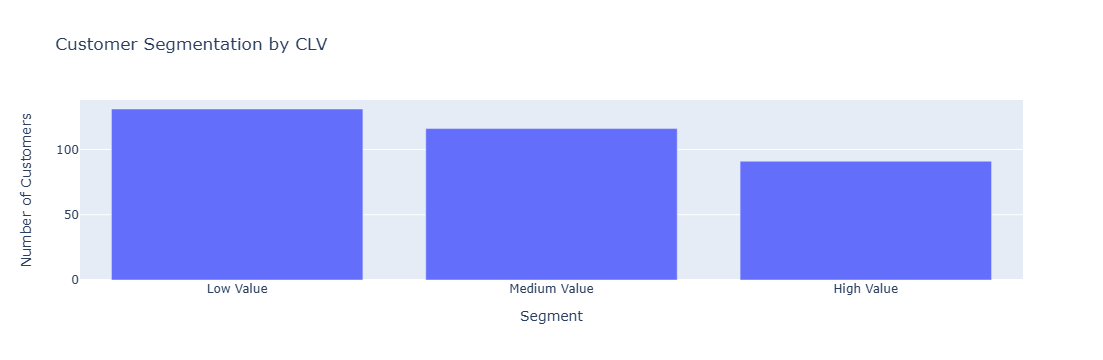

In [14]:
data['CLV'] = (data['Total_Purchases'] * data['Total_Pages_Viewed']) / data['Age']

data['Segment'] = pd.cut(data['CLV'], bins=[1, 2.5, 5, float('inf')],labels=['Low Value', 'Medium Value', 'High Value'])

segment_counts = data['Segment'].value_counts().reset_index()
segment_counts.columns = ['Segment', 'Count']

# Create a bar chart to visualize the customer segments
fig = px.bar(segment_counts, x='Segment', y='Count', title='Customer Segmentation by CLV')
fig.update_xaxes(title='Segment')
fig.update_yaxes(title='Number of Customers')
fig.show()

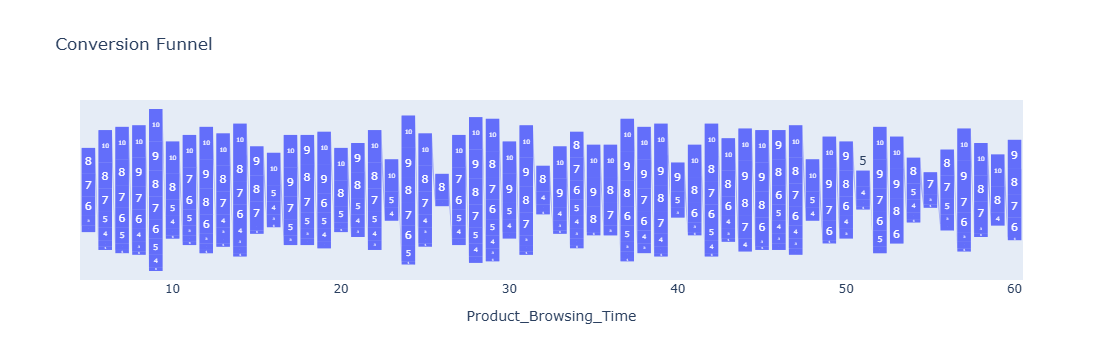

In [15]:
# Funnel analysis
funnel_data = data[['Product_Browsing_Time', 'Items_Added_to_Cart', 'Total_Purchases']]
funnel_data = funnel_data.groupby(['Product_Browsing_Time', 'Items_Added_to_Cart']).sum().reset_index()

fig = px.funnel(funnel_data, x='Product_Browsing_Time', y='Items_Added_to_Cart', title='Conversion Funnel')
fig.show()

In [16]:
# Calculate churn rate
data['Churned'] = data['Total_Purchases'] == 0

churn_rate = data['Churned'].mean()
print(churn_rate)

0.198
